In [1]:
import requests
import os
import gmaps
import datetime 
import pandas as pd
import numpy as np
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [2]:
city_data = pd.read_csv("Resources/Collected_Pollution_Measurements.csv")
city_data.head()

,datetime,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,City,Public Transportation Rate,Median Age,Population
0,2021-01-31 12:00:00,781.06,38.89,87.74,0.09,23.60,35.14,45.48,10.89,4.0,Brooklyn,61.84046,34.694286,2480847.0
1,2021-01-31 11:00:00,534.06,5.87,78.14,4.47,20.98,18.22,24.25,6.33,2.0,Brooklyn,61.84046,34.694286,2480847.0
2,2021-01-31 10:00:00,460.63,1.36,67.86,13.23,20.03,13.65,18.51,5.07,2.0,Brooklyn,61.84046,34.694286,2480847.0
3,2021-01-31 09:00:00,447.27,0.83,63.75,15.38,19.07,12.76,17.30,4.75,2.0,Brooklyn,61.84046,34.694286,2480847.0
4,2021-01-31 08:00:00,447.27,0.82,61.69,15.02,17.17,12.64,16.99,4.69,2.0,Brooklyn,61.84046,34.694286,2480847.0


In [3]:
city_df = city_data.groupby(["City"])
population = city_df["Population"].mean()
aqi = city_df["aqi"].mean()
ptr = city_df["Public Transportation Rate"].mean()

city_population_df = pd.DataFrame({"Population": population, "AQI" : aqi, "Public Transportation Rate": ptr})

city_population_df

,Population,AQI,Public Transportation Rate
City,,,
Abilene,57336.0,1.439024,0.802012
Aguadilla Pueblo,53162.0,1.142037,0.837139
Alpharetta,163810.0,1.281205,0.966486
Altoona,63235.0,1.205165,0.594901
Ames,58891.0,1.464849,8.730485
...,...,...,...
Woodside,88939.0,1.428981,68.267635
Woodville,75390.0,1.183644,0.596567
Yardley,51148.0,1.680057,5.698565


In [7]:
high_aqi = city_population_df.loc[city_population_df["AQI"] > 3]
high_aqi.head(20)

,Population,AQI,Public Transportation Rate
City,,,
Artesia,50069.0,3.571019,2.636384
E RNCHO DMNGZ,53657.0,3.648494,6.627432
HUNTINGTN BCH,88481.0,3.225251,0.780783
Hacienda Heights,55237.0,3.515065,2.200715
Los Angeles,1019978.0,3.836442,12.176151
Palos Verdes Peninsula,67902.0,3.401722,0.796766
Santa Monica,53651.0,3.602582,3.566043


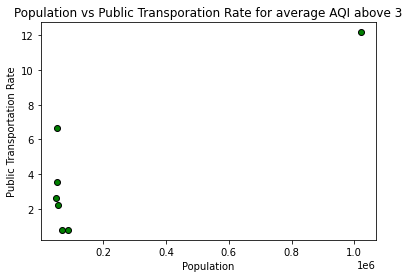

In [13]:
x = high_aqi["Population"]
y = high_aqi["Public Transportation Rate"]

plt.scatter(x, y, facecolors="green", edgecolors="black")

plt.xlabel("Population")
plt.ylabel("Public Transportation Rate")
plt.title("Population vs Public Transporation Rate for average AQI above 3")
plt.show()

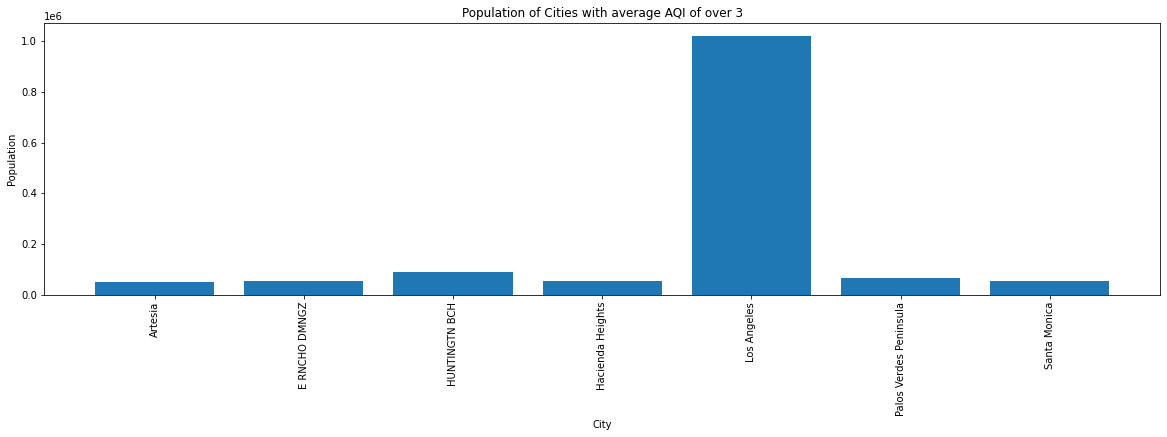

In [12]:
city = high_aqi.index
population = high_aqi["Population"]
plt.figure(figsize=(20, 5))
plt.xlabel("City")
plt.ylabel("Population")
plt.xticks(rotation=90)
plt.title("Population of Cities with average AQI of over 3")

plt.bar(city, population)
plt.show()